In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor, Ridge, Lasso

In [3]:
# importing data
df= pd.read_csv("gld_price_data.csv")

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# checking null values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
df.drop("Date",axis=1, inplace=True)
cols= df.columns

In [7]:
# checking correlations
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

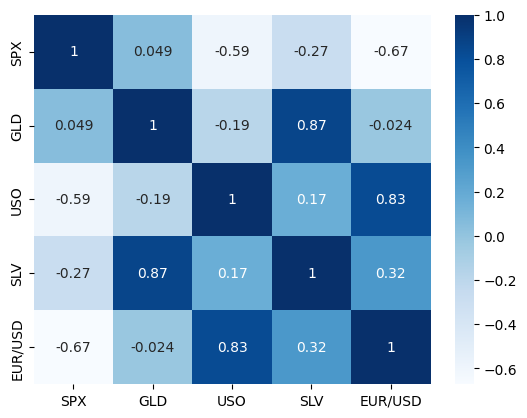

In [8]:
# checking correlations using heatmap
sns.heatmap(df.corr(), cmap= "Blues", annot=True)

<Axes: >

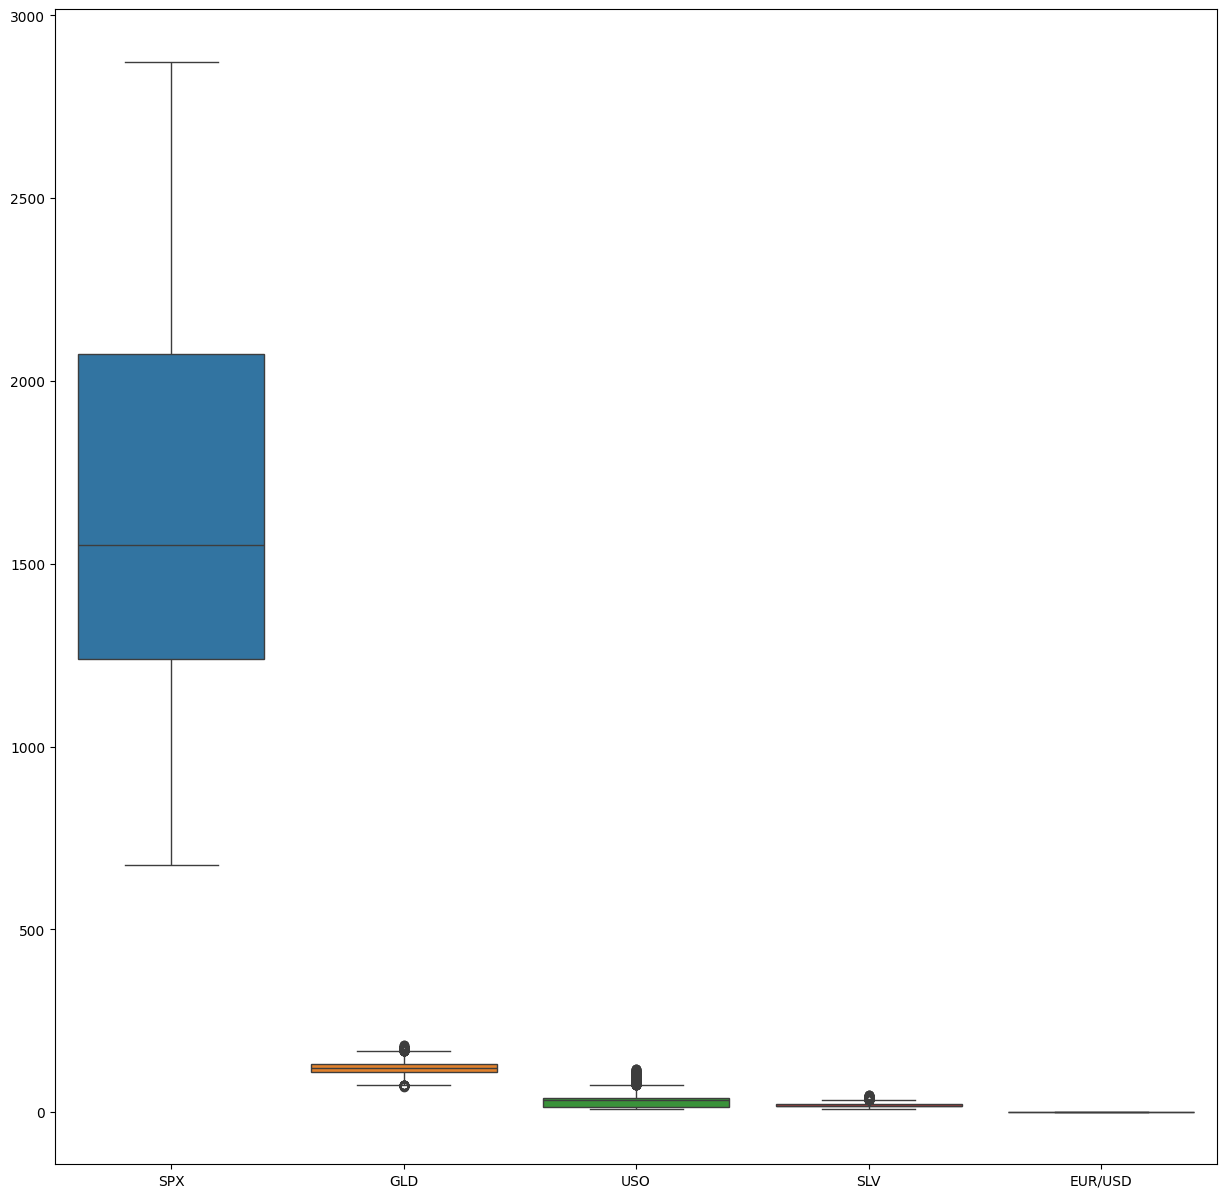

In [9]:
# checking outliers
plt.figure(figsize=(15,15))
sns.boxplot(df)

In [10]:
df.shape

(2290, 5)

In [11]:
# handling outliers
upper= df.quantile(.97)
lower= df.quantile(.03)

In [12]:
df=np.where(df>upper, upper, np.where(df<lower, lower, df))

<Axes: >

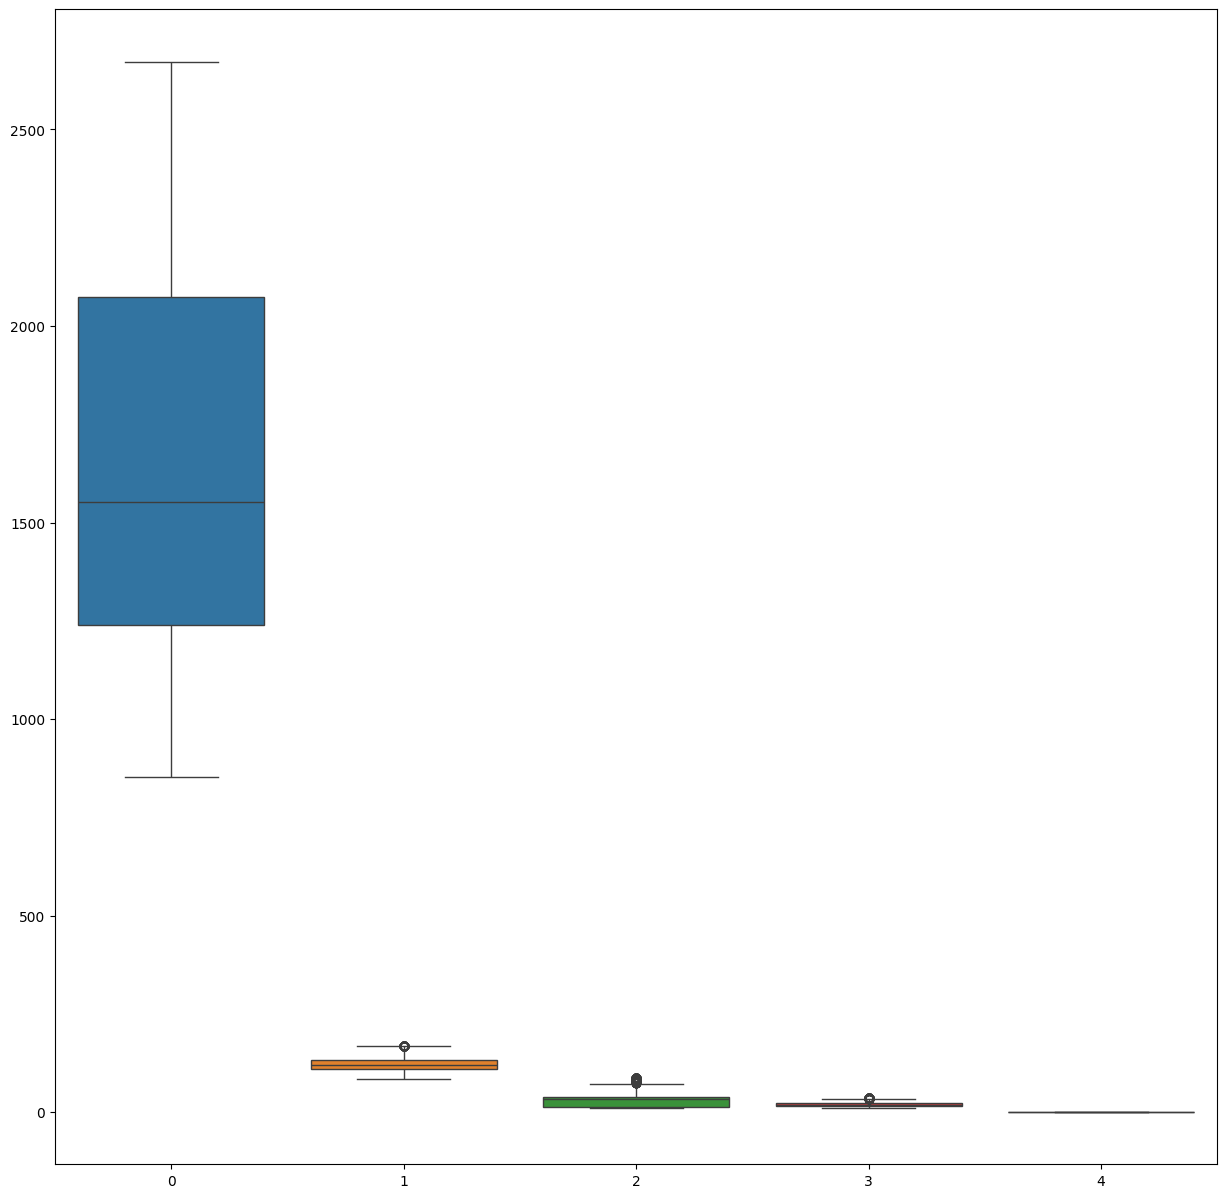

In [13]:
# checking outliers
plt.figure(figsize=(15,15))
sns.boxplot(df)

In [14]:
df= pd.DataFrame(df, columns=cols )

In [15]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1653.885424,122.812709,31.422375,20.016184,1.283215
std,512.331974,22.673908,17.974202,6.775376,0.129683
min,852.013793,83.903500,9.606700,11.180000,1.064192
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2672.154209,169.339697,87.804802,36.232899,1.546574


In [16]:
# labeling data
X= df.drop("GLD", axis=1)
Y=df["GLD"]

In [17]:
# splitting data into train and test data
X_train, X_test, y_train, y_test= train_test_split(X,Y, random_state= 42, test_size=0.2)

## Using RandomForestRegressor

In [18]:
rfr= RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
y_pred= rfr.predict(X_test)

In [20]:
# r2_score for test data
print("r2_score for test data is :" ,r2_score(y_test, y_pred))

r2_score for test data is : 0.9904002337538905


## Using DecisionTreeRegressor

In [88]:
clr= DecisionTreeRegressor(criterion= "absolute_error")
clr.fit(X_train, y_train)


DecisionTreeRegressor(criterion='absolute_error')

In [89]:
y_pred2= clr.predict(X_test)

In [90]:
# r2_score for test data
print("r2_score for test data is :" ,r2_score(y_test, y_pred2))

r2_score for test data is : 0.9870123347401673
